# Fetching Data From API

## Directly Storin to Database

In [ ]:
import cfbd
from cfbd.rest import ApiException
from datetime import datetime
from sqlalchemy import create_engine, Table, Column, Integer, String, Float, Boolean, DateTime, MetaData, JSON
from dateutil.parser import isoparse

# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'jV0Q0EwcJ9CPh/tsccoErh75xJVcvtRl8sqE3xxmMRimM1i7BL9LkkHyeeCy933S'  # Replace with your API key
configuration.api_key_prefix['Authorization'] = 'Bearer'

# Create an instance of the API class
api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))

# Calculate the current year
current_year = datetime.now().year

# Initialize an empty list to store the data
all_game_data = []

# Loop through the last 10 years and make API requests
for year in range(current_year - 10, current_year + 1):
    try:
        # Get Games data for the current year
        api_response = api_instance.get_games(year=year)

        # Extend the list with data for the current year
        all_game_data.extend(api_response)

    except ApiException as e:
        print(f"Exception when calling GamesApi->get_games for year {year}: {e}\n")

# SQLite Database Configuration
database_name = 'cfb_data.db'
engine = create_engine(f'sqlite:///{database_name}', echo=True)
metadata = MetaData()

# Define the database table
games = Table(
    'games',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('season', Integer),
    Column('week', Integer),
    Column('season_type', String),
    Column('start_date', DateTime),
    Column('start_time_tbd', Boolean),
    Column('completed', Boolean),
    Column('neutral_site', Boolean),
    Column('conference_game', Boolean),
    Column('attendance', Integer),
    Column('venue_id', Integer),
    Column('venue', String),
    Column('home_id', Integer),
    Column('home_team', String),
    Column('home_conference', String),
    Column('home_division', String),
    Column('home_points', Integer),
    Column('home_line_scores', JSON),
    Column('home_post_win_prob', Float),
    Column('home_pregame_elo', Float),
    Column('home_postgame_elo', Float),
    Column('away_id', Integer),
    Column('away_team', String),
    Column('away_conference', String),
    Column('away_division', String),
    Column('away_points', Integer),
    Column('away_line_scores', JSON),
    Column('away_post_win_prob', Float),
    Column('away_pregame_elo', Float),
    Column('away_postgame_elo', Float),
    Column('excitement_index', Float),
    Column('highlights', String),
    Column('notes', String)
)

# Create the table in the database
metadata.create_all(engine)

# Insert data into the database
connection = engine.connect()
for game in all_game_data:
    ins = games.insert().values(
        season=game.season,
        week=game.week,
        season_type=game.season_type,
        start_date=isoparse(game.start_date),  # Parse ISO 8601 date
        start_time_tbd=game.start_time_tbd,
        completed=game.completed,
        neutral_site=game.neutral_site,
        conference_game=game.conference_game,
        attendance=game.attendance,
        venue_id=game.venue_id,
        venue=game.venue,
        home_id=game.home_id,
        home_team=game.home_team,
        home_conference=game.home_conference,
        home_division=game.home_division,
        home_points=game.home_points,
        home_line_scores=game.home_line_scores,
        home_post_win_prob=game.home_post_win_prob,
        home_pregame_elo=game.home_pregame_elo,
        home_postgame_elo=game.home_postgame_elo,
        away_id=game.away_id,
        away_team=game.away_team,
        away_conference=game.away_conference,
        away_division=game.away_division,
        away_points=game.away_points,
        away_line_scores=game.away_line_scores,
        away_post_win_prob=game.away_post_win_prob,
        away_pregame_elo=game.away_pregame_elo,
        away_postgame_elo=game.away_postgame_elo,
        excitement_index=game.excitement_index,
        highlights=game.highlights,
        notes=game.notes
    )
    connection.execute(ins)

print(f"Data saved to {database_name}")


## Storing through CSV

In [13]:
from __future__ import print_function
import time
import cfbd
from cfbd.rest import ApiException
from pprint import pprint
from datetime import datetime
import csv

# Configure API key authorization: ApiKeyAuth
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'jV0Q0EwcJ9CPh/tsccoErh75xJVcvtRl8sqE3xxmMRimM1i7BL9LkkHyeeCy933S'  # Replace with your API key
configuration.api_key_prefix['Authorization'] = 'Bearer'

# Create an instance of the API class
api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))

# Calculate the current year
current_year = datetime.now().year

# Initialize an empty list to store the data
all_game_data = []

# Loop through the last 10 years and make API requests
for year in range(current_year - 10, current_year + 1):
    try:
        # Get Games data for the current year
        api_response = api_instance.get_games(year=year)

        # Extend the list with data for the current year
        all_game_data.extend(api_response)

    except ApiException as e:
        print(f"Exception when calling GamesApi->get_games for year {year}: {e}\n")

# Define the CSV file name
csv_file_name = "games_data.csv"

# Save the data to a CSV file
with open(csv_file_name, mode='w', newline='') as csv_file:
    fieldnames = all_game_data[0].to_dict().keys()  # Assuming the first item contains the field names
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write each row of data
    for game in all_game_data:
        writer.writerow(game.to_dict())

print(f"Data saved to {csv_file_name}")


Data saved to games_data.csv


# Checking Data From CSV File

In [1]:
import pandas as pd

In [2]:
df_json = pd.read_csv('games_data.csv', encoding='latin-1')
df_json

C:\Users\DELL\AppData\Local\Temp\ipykernel_8980\4148383186.py:1: DtypeWarning: Columns (5,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json = pd.read_csv('games_data.csv', encoding='latin-1')


,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,332412309,2013,1,regular,2013-08-29T22:00:00.000Z,False,True,False,False,20790.0,...,Big South,fcs,10.0,"[0, 3, 7, 0]",0.603843,1467.0,1461.0,NaN,NaN,NaN
1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,NaN,True,False,False,81572.0,...,ACC,fbs,10.0,"[0, 7, 3, 0]",0.344414,1638.0,1612.0,NaN,NaN,NaN
2,332410154,2013,1,regular,2013-08-29T22:30:00.000Z,False,True,False,False,26202.0,...,Big South,fcs,7.0,"[7, 0, 0, 0]",0.000211,NaN,NaN,NaN,NaN,NaN
3,332412413,2013,1,regular,2013-08-29T23:00:00.000Z,False,True,False,False,NaN,...,NaN,NaN,13.0,"[0, 0, 7, 6]",NaN,NaN,NaN,NaN,NaN,NaN
4,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,True,False,False,44217.0,...,Mountain West,fbs,23.0,"[6, 7, 3, 7]",0.551678,1207.0,1158.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20836,401520444,2023,13,regular,2023-11-25T20:30:00.000Z,False,False,False,True,NaN,...,Conference USA,fbs,NaN,NaN,NaN,1572.0,NaN,NaN,NaN,NaN
20837,401520437,2023,13,regular,2023-11-25T21:00:00.000Z,False,False,False,True,NaN,...,Conference USA,fbs,NaN,NaN,NaN,1538.0,NaN,NaN,NaN,NaN
20838,401532630,2023,13,regular,2023-11-26T02:00:00.000Z,False,False,False,True,NaN,...,Mountain West,fbs,NaN,NaN,NaN,1418.0,NaN,NaN,NaN,NaN
20839,401532626,2023,13,regular,2023-11-26T04:00:00.000Z,False,False,False,True,NaN,...,Mountain West,fbs,NaN,NaN,NaN,1260.0,NaN,NaN,NaN,NaN


In [3]:
df_json.shape

(20841, 33)

In [4]:
df_json.info()#.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20841 entries, 0 to 20840
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20841 non-null  int64  
 1   season              20841 non-null  int64  
 2   week                20841 non-null  int64  
 3   season_type         20841 non-null  object 
 4   start_date          20841 non-null  object 
 5   start_time_tbd      15736 non-null  object 
 6   completed           20841 non-null  bool   
 7   neutral_site        20841 non-null  bool   
 8   conference_game     20841 non-null  bool   
 9   attendance          8278 non-null   float64
 10  venue_id            20718 non-null  float64
 11  venue               20718 non-null  object 
 12  home_id             20841 non-null  int64  
 13  home_team           20841 non-null  object 
 14  home_conference     20787 non-null  object 
 15  home_division       20787 non-null  object 
 16  home

# Converting CSV File to SQL Database

In [5]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

# Define your MySQL database connection parameters
host = '127.0.0.1'
database = 'CFDBDatabase'
user = 'root'
password = '23730'

# Define the CSV file path
csv_file_name = 'games_data.csv'

try:
    # Establish a MySQL database connection
    connection = mysql.connector.connect(
        host=host,
        database=database,
        user=user,
        password=password
    )

    if connection.is_connected():
        cursor = connection.cursor()
        
        df = pd.read_csv(csv_file_name, encoding='Latin-1')

        # Modify column names to ensure they are valid for MySQL
        df.columns = [col.replace(' ', '_') for col in df.columns]

        # Create the table dynamically based on the DataFrame's columns and inferred data types
        create_table_query = f"CREATE TABLE IF NOT EXISTS games ("
        for column, dtype in zip(df.columns, df.dtypes):
            mysql_data_type = "VARCHAR(255)" if dtype == 'object' else "INT"
            create_table_query += f"{column} {mysql_data_type}, "
        create_table_query = create_table_query.rstrip(", ") + ")"
        
        cursor.execute(create_table_query)
        print("Table 'games' created.")

        # Iterate through columns to handle data type inconsistencies
        for column in df.columns:
            if df[column].dtype == 'object':
                # If the column contains strings, change its data type to VARCHAR
                df[column] = df[column].astype(str)
            elif df[column].dtype == 'float64':
                # If the column contains floating-point numbers, convert them to integers
                df[column] = df[column].fillna(0).astype(int)

        # Modify column names to ensure they are valid for MySQL
        df.columns = [col.replace(' ', '_') for col in df.columns]

        # Insert data from DataFrame into the MySQL table
        for _, row in df.iterrows():
            insert_query = f"INSERT INTO games ({', '.join(df.columns)}) VALUES ({', '.join(['%s'] * len(df.columns))})"
            cursor.execute(insert_query, tuple(row))

        # Commit the changes
        connection.commit()
        print("Data loaded into MySQL successfully.")

except Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8980\2110375728.py:26: DtypeWarning: Columns (5,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_name, encoding='Latin-1')


Table 'games' created.
Data loaded into MySQL successfully.


# Getting Data From Database

In [7]:
import mysql.connector
import pandas as pd

host = '127.0.0.1'
database = 'CFDBDatabase'
user = 'root'
password = '23730'

# Establish a MySQL database connection
try:
    connection = mysql.connector.connect(
        host=host,
        database=database,
        user=user,
        password=password
    )

    if connection.is_connected():
        cursor = connection.cursor()
 
        query = "SELECT * FROM games"

        cursor.execute(query)
        data = cursor.fetchall()

        column_names = [desc[0] for desc in cursor.description]

        df = pd.DataFrame(data, columns=column_names)

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()

df.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,332412309,2013,1,regular,2013-08-29T22:00:00.000Z,False,1,0,0,20790,...,Big South,fcs,10,"[0, 3, 7, 0]",0,1467,1461,0,nan,nan
1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,nan,1,0,0,81572,...,ACC,fbs,10,"[0, 7, 3, 0]",0,1638,1612,0,nan,nan
2,332410154,2013,1,regular,2013-08-29T22:30:00.000Z,False,1,0,0,26202,...,Big South,fcs,7,"[7, 0, 0, 0]",0,0,0,0,nan,nan
3,332412413,2013,1,regular,2013-08-29T23:00:00.000Z,False,1,0,0,0,...,nan,nan,13,"[0, 0, 7, 6]",0,0,0,0,nan,nan
4,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,nan,1,0,0,44217,...,Mountain West,fbs,23,"[6, 7, 3, 7]",0,1207,1158,0,nan,nan


In [8]:
df.sample(100)

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
32357,401282181,2021,2,regular,2021-09-11T22:00:00.000Z,False,1,0,0,12274,...,Big South,fcs,10,"[3, 7, 0, 0]",0,0,0,3,nan,nan
7710,401019478,2018,2,regular,2018-09-08T19:30:00.000Z,nan,1,0,0,25511,...,Mid-American,fbs,36,"[6, 6, 10, 14]",0,1372,1399,7,https://www.youtube.com/watch?v=A5KwKCg527U,nan
35965,401426337,2022,5,regular,2022-10-01T23:00:00.000Z,False,1,0,1,18756,...,Sun Belt,fbs,30,"[0, 7, 10, 13]",0,1398,1403,8,nan,nan
25855,400871308,2016,5,regular,2016-09-30T23:00:00.000Z,False,1,0,1,0,...,Ivy,fcs,37,"[14, 14, 7, 2]",0,0,0,0,nan,nan
9052,401128354,2019,1,regular,2019-08-29T23:00:00.000Z,False,1,0,0,0,...,Pioneer,fcs,7,"[0, 0, 7, 0]",0,0,0,0,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,401404103,2022,9,regular,2022-10-29T16:00:00.000Z,False,1,0,1,50426,...,Big 12,fbs,41,"[7, 21, 0, 13]",0,1670,1667,5,nan,nan
37887,401424452,2022,12,regular,2022-11-19T18:00:00.000Z,False,1,0,1,0,...,CAA,fcs,7,"[0, 7, 0, 0]",0,0,0,4,nan,nan
13186,401329189,2021,11,regular,2021-11-13T17:00:00.000Z,False,1,0,1,0,...,Pennsylvania State Athletic,ii,24,"[7, 3, 7, 7]",0,0,0,0,nan,nan
31935,401265818,2020,14,regular,2020-12-05T17:00:00.000Z,False,1,0,1,11378,...,SEC,fbs,48,"[6, 21, 6, 15]",0,1406,1408,9,https://www.youtube.com/watch?v=WKZaqfQVefc,nan


# Data Cleaning

In [9]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41682 entries, 0 to 41681
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  41682 non-null  int64 
 1   season              41682 non-null  int64 
 2   week                41682 non-null  int64 
 3   season_type         41682 non-null  object
 4   start_date          41682 non-null  object
 5   start_time_tbd      41682 non-null  object
 6   completed           41682 non-null  int64 
 7   neutral_site        41682 non-null  int64 
 8   conference_game     41682 non-null  int64 
 9   attendance          41682 non-null  int64 
 10  venue_id            41682 non-null  int64 
 11  venue               41682 non-null  object
 12  home_id             41682 non-null  int64 
 13  home_team           41682 non-null  object
 14  home_conference     41682 non-null  object
 15  home_division       41682 non-null  object
 16  home_points         41

In [10]:
import numpy as np

df = df.applymap(lambda x: np.nan if x == 'nan' or x == 'NaN' else x)
df.isnull().sum()

id                        0
season                    0
week                      0
season_type               0
start_date                0
start_time_tbd        10210
completed                 0
neutral_site              0
conference_game           0
attendance                0
venue_id                  0
venue                   246
home_id                   0
home_team                 0
home_conference         108
home_division           108
home_points               0
home_line_scores       3594
home_post_win_prob        0
home_pregame_elo          0
home_postgame_elo         0
away_id                   0
away_team                 0
away_conference         670
away_division           670
away_points               0
away_line_scores       3594
away_post_win_prob        0
away_pregame_elo          0
away_postgame_elo         0
excitement_index          0
highlights            35256
notes                 41196
dtype: int64

In [11]:
df['start_time_tbd'].fillna(df['start_time_tbd'].mode()[0], inplace=True)
df['venue'].fillna(df['venue'].mode()[0], inplace=True)
df['home_conference'].fillna(df['home_conference'].mode()[0], inplace=True)
df['home_division'].fillna(df['home_division'].mode()[0], inplace=True)
df['home_line_scores'].fillna(df['home_line_scores'].mode()[0], inplace=True)
df['away_conference'].fillna(df['home_line_scores'].mode()[0], inplace=True)
df['away_division'].fillna(df['home_line_scores'].mode()[0], inplace=True)
df['away_line_scores'].fillna(df['away_line_scores'].mode()[0], inplace=True)

In [27]:
df.drop(['home_post_win_prob'], axis=1, inplace=True)

In [28]:
df.isnull().sum().index

Index(['id', 'season', 'week', 'season_type', 'start_date', 'start_time_tbd',
       'completed', 'neutral_site', 'conference_game', 'attendance',
       'venue_id', 'venue', 'home_id', 'home_team', 'home_conference',
       'home_division', 'home_points', 'home_line_scores', 'home_pregame_elo',
       'home_postgame_elo', 'away_id', 'away_team', 'away_conference',
       'away_division', 'away_points', 'away_line_scores', 'away_pregame_elo',
       'away_postgame_elo', 'excitement_index'],
      dtype='object')

# Data Analysis

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.corr()

,id,season,week,completed,neutral_site,conference_game,attendance,venue_id,home_id,home_points,home_pregame_elo,home_postgame_elo,away_id,away_points,away_pregame_elo,away_postgame_elo,excitement_index
id,1.000000,0.504761,-0.028682,-0.091461,-0.093490,0.043279,-0.096717,0.178050,0.033690,-0.071076,-0.054291,-0.067972,0.037819,-0.038648,-0.061038,-0.073629,0.166636
season,0.504761,1.000000,-0.077035,-0.350063,-0.084861,0.062836,-0.282848,0.404622,0.107516,-0.217866,-0.196126,-0.247843,0.118154,-0.158722,-0.221043,-0.272455,-0.005641
week,-0.028682,-0.077035,1.000000,-0.206977,-0.021437,0.528468,-0.020569,-0.064945,-0.028398,-0.175278,0.139377,0.103177,-0.043283,-0.001193,0.173637,0.140163,0.032923
completed,-0.091461,-0.350063,-0.206977,1.000000,0.026888,-0.167222,0.187759,-0.153355,-0.032019,0.496560,0.092039,0.225368,-0.034086,0.445090,0.086280,0.222585,0.186293
neutral_site,-0.093490,-0.084861,-0.021437,0.026888,1.000000,-0.074517,0.016055,-0.086467,0.124110,0.011883,-0.011148,-0.006826,-0.001733,0.024412,-0.004053,-0.000285,-0.009090
conference_game,0.043279,0.062836,0.528468,-0.167222,-0.074517,1.000000,-0.117080,0.059572,-0.026171,-0.236968,0.038093,0.016246,-0.080143,0.067377,0.090026,0.071325,0.004357
attendance,-0.096717,-0.282848,-0.020569,0.187759,0.016055,-0.117080,1.000000,-0.239186,-0.098274,0.194187,0.716983,0.749672,-0.094860,0.020066,0.665500,0.695246,0.368879
venue_id,0.178050,0.404622,-0.064945,-0.153355,-0.086467,0.059572,-0.239186,1.000000,0.171261,-0.122263,-0.272664,-0.265292,0.104213,-0.051254,-0.263075,-0.255631,-0.184029
home_id,0.033690,0.107516,-0.028398,-0.032019,0.124110,-0.026171,-0.098274,0.171261,1.000000,-0.046878,-0.115007,-0.110179,0.073625,0.013325,-0.111672,-0.106788,-0.075985
home_points,-0.071076,-0.217866,-0.175278,0.496560,0.011883,-0.236968,0.194187,-0.122263,-0.046878,1.000000,0.083972,0.160330,0.029871,0.022004,0.007523,0.062659,0.047538


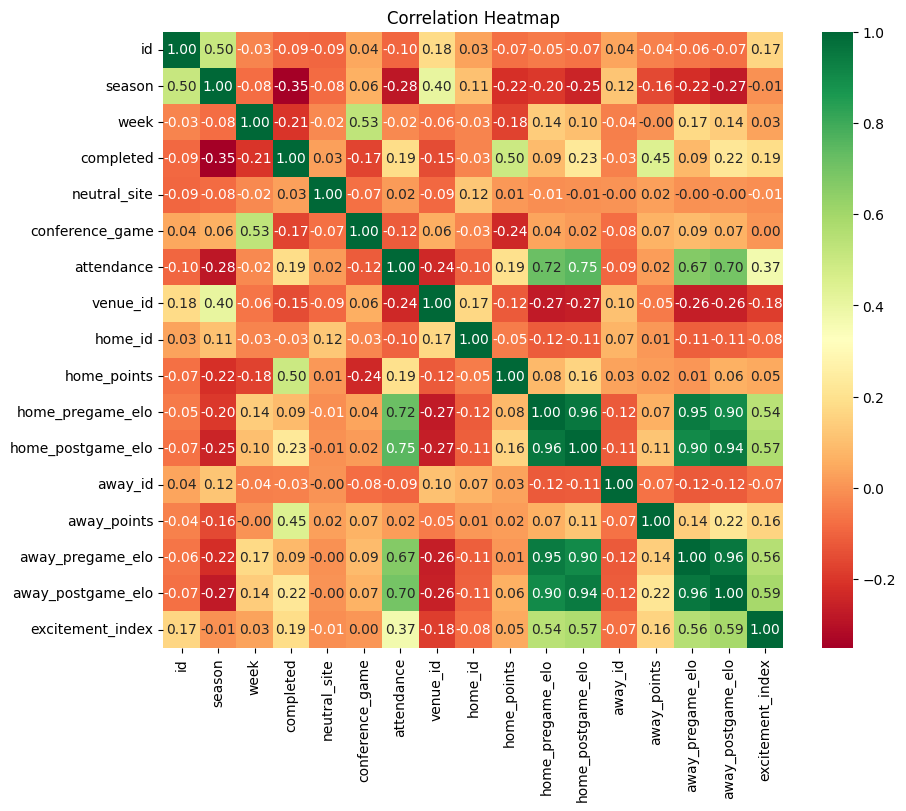

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(newdf.corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


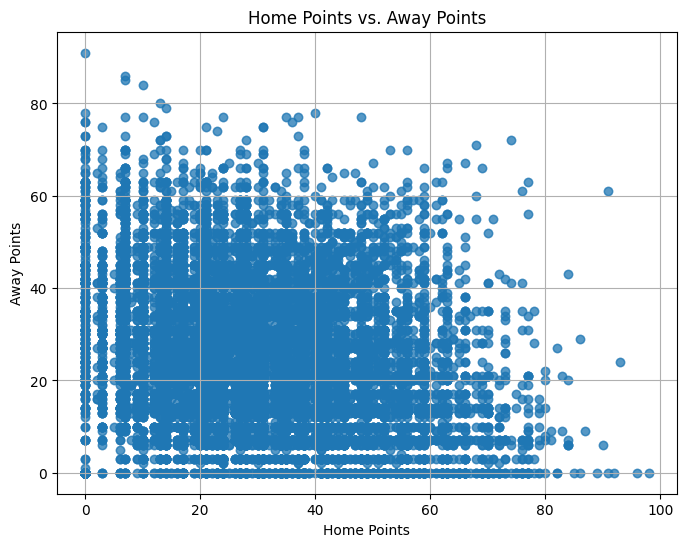

In [31]:
home_points = df['home_points']
away_points = df['away_points']

plt.figure(figsize=(8, 6))
plt.scatter(home_points, away_points, alpha=0.5)
plt.title('Home Points vs. Away Points')
plt.xlabel('Home Points')
plt.ylabel('Away Points')
plt.grid(True)
plt.show()

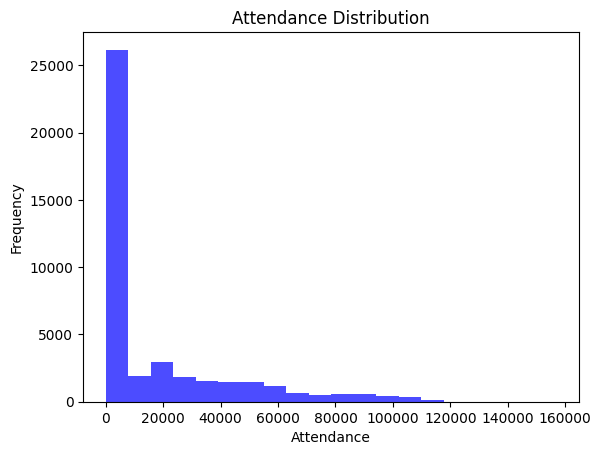

In [32]:
plt.hist(df['attendance'], bins=20, color='blue', alpha=0.7)
plt.title('Attendance Distribution')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()


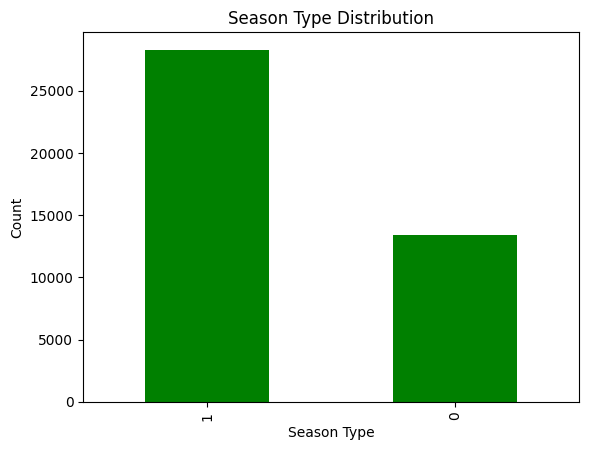

In [33]:
season_counts = df['conference_game'].value_counts()
season_counts.plot(kind='bar', color='green')
plt.title('Season Type Distribution')
plt.xlabel('Season Type')
plt.ylabel('Count')
plt.show()

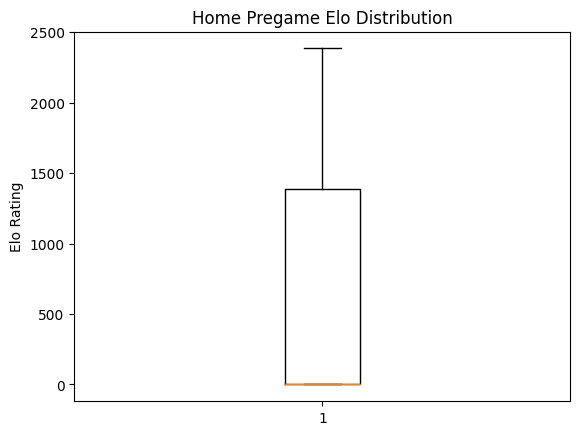

In [34]:
plt.boxplot(df['away_pregame_elo'])
plt.title('Home Pregame Elo Distribution')
plt.ylabel('Elo Rating')
plt.show()

# Training Models

In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_copy = df.copy()

# Define the list of categorical columns to label encode
categorical_columns = ['season_type', 'venue', 'home_team', 'home_conference', 'home_line_scores', 'home_division', 'away_team', 'away_conference', 'away_division', 'away_line_scores']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Display the head of the updated DataFrame
df_copy.head()


,id,season,week,season_type,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,...,away_id,away_team,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index
0,332412309,2013,1,0,False,1,0,0,20790,3696,...,2335,330,8,2,10,858,0,1467,1461,0
1,332412579,2013,1,0,False,1,0,0,81572,3994,...,153,441,0,1,10,1116,0,1638,1612,0
2,332410154,2013,1,0,False,1,0,0,26202,3630,...,2506,498,8,2,7,4335,0,0,0,0
3,332412413,2013,1,0,False,1,0,0,0,3774,...,95,489,77,0,13,173,0,0,0,0
4,332410135,2013,1,0,False,1,0,0,44217,3953,...,2439,639,44,1,23,4300,0,1207,1158,0


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame called 'df_copy' with the relevant data
# Define the target variables (y) for home and away teams
y_home = df_copy['home_points']
y_away = df_copy['away_points']

# Define the features (X)
X = df_copy.drop(['home_points', 'away_points'], axis=1)

# Split the dataset into a training set and a test set
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test = train_test_split(
    X, y_home, y_away, test_size=0.2, random_state=42)

# Create and fit multiple linear regression models for both home and away teams
model_home = LinearRegression()
model_away = LinearRegression()

model_home.fit(X_train, y_home_train)
model_away.fit(X_train, y_away_train)

# Make predictions on the test set for both home and away teams
y_home_pred = model_home.predict(X_test)
y_away_pred = model_away.predict(X_test)

# Evaluate the models
mse_home = mean_squared_error(y_home_test, y_home_pred)
r2_home = r2_score(y_home_test, y_home_pred)

mse_away = mean_squared_error(y_away_test, y_away_pred)
r2_away = r2_score(y_away_test, y_away_pred)

print("Home Team Model Mean Squared Error:", mse_home)
print("Home Team Model R-squared:", r2_home)

print("Away Team Model Mean Squared Error:", mse_away)
print("Away Team Model R-squared:", r2_away)


Home Team Model Mean Squared Error: 175.45225184921065
Home Team Model R-squared: 0.3953936400276288
Away Team Model Mean Squared Error: 148.86281823176668
Away Team Model R-squared: 0.39421448978275264


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame called 'df_copy' with the relevant data
# Define the target variables (y) for home and away teams
y_home = df_copy['home_points'] > df_copy['away_points']
y_away = ~y_home  # Away team wins if the home team doesn't

# Define the features (X)
X = df_copy.drop(['home_points', 'away_points'], axis=1)

# Split the dataset into a training set and a test set
X_train, X_test, y_home_train, y_home_test, y_away_train, y_away_test = train_test_split(
    X, y_home, y_away, test_size=0.2, random_state=42)

# Create and fit logistic regression models for both home and away teams
model_home = LogisticRegression()
model_away = LogisticRegression()

model_home.fit(X_train, y_home_train)
model_away.fit(X_train, y_away_train)

# Make predictions on the test set for both home and away teams
y_home_pred = model_home.predict(X_test)
y_away_pred = model_away.predict(X_test)

# Evaluate the models
accuracy_home = accuracy_score(y_home_test, y_home_pred)
accuracy_away = accuracy_score(y_away_test, y_away_pred)

print("Home Team Model Accuracy:", accuracy_home)
print("Away Team Model Accuracy:", accuracy_away)

# You can also check other classification metrics with classification_report
print("Classification Report for Home Team Model:")
print(classification_report(y_home_test, y_home_pred))

print("Classification Report for Away Team Model:")
print(classification_report(y_away_test, y_away_pred))


Home Team Model Accuracy: 0.5310626049412329
Away Team Model Accuracy: 0.5310626049412329
Classification Report for Home Team Model:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1955
        True       0.53      1.00      0.69      2214

    accuracy                           0.53      4169
   macro avg       0.27      0.50      0.35      4169
weighted avg       0.28      0.53      0.37      4169

Classification Report for Away Team Model:
              precision    recall  f1-score   support

       False       0.53      1.00      0.69      2214
        True       0.00      0.00      0.00      1955

    accuracy                           0.53      4169
   macro avg       0.27      0.50      0.35      4169
weighted avg       0.28      0.53      0.37      4169



C:\Users\DELL\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\AI\li